In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import cartopy as cy
import cartopy.crs as ccrs
from functions import count_ARs

In [2]:
#b'/home/jovyan/Tjaernoe2022-group5/notebooks/Lea/Tjaernoe2022-group5/notebooks/Lea/20352049_AR_detection.nc'
path = '20352050_AR_detection.nc'
ar3550 = xr.open_dataset(path)

In [3]:
def count_ARs(ds, lat_cut):
    '''
    Counts number of AR at each time step. Returns dataset with added coordinate ar_counts_[lat_cut].
    '''
    if lat_cut<0:
        pole_ds = ds.sel(lat= slice(-90, lat_cut))
    else:
        pole_ds = ds.sel(lat= slice(lat_cut, 90))
 
    ar_counts = np.zeros(len(pole_ds.time))
    for i,ts in enumerate(pole_ds.time):
        ll = xr.plot.contour(pole_ds.sel(time=ts).ivt, levels=[0.0,1.0])
        plt.close()
        if len(ll.collections)>1: #You can remove this and next line if you have run it a few times without getting the printout :))
            print('julia was wrong about something, tell her to fix it'+ts)
        nr_ar = len(ll.collections[0].get_paths())
        ar_counts[i] = nr_ar
    ds[f'ar_counts_{lat_cut}']= ar_counts
    return ds

In [4]:
arc= count_ARs(ds = ar3550, lat_cut= 60)
ant = count_ARs(ds = ar3550, lat_cut= -60)
ar3550 = arc.merge(ant)

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/plot/plot.py:1417: UserWarning: No contour levels were found within the data range.
  primitive = ax.contour(x, y, z, **kwargs)


In [5]:
#sum of occurence of atmospheric rivers over the whole year
#ar3550['ivt'].sum('time').plot()

In [6]:
sm = ar3550['ivt'].sum('time')
smarc = sm.sel(lat=slice(50,90))
smant = sm.sel(lat=slice(-90,-50))

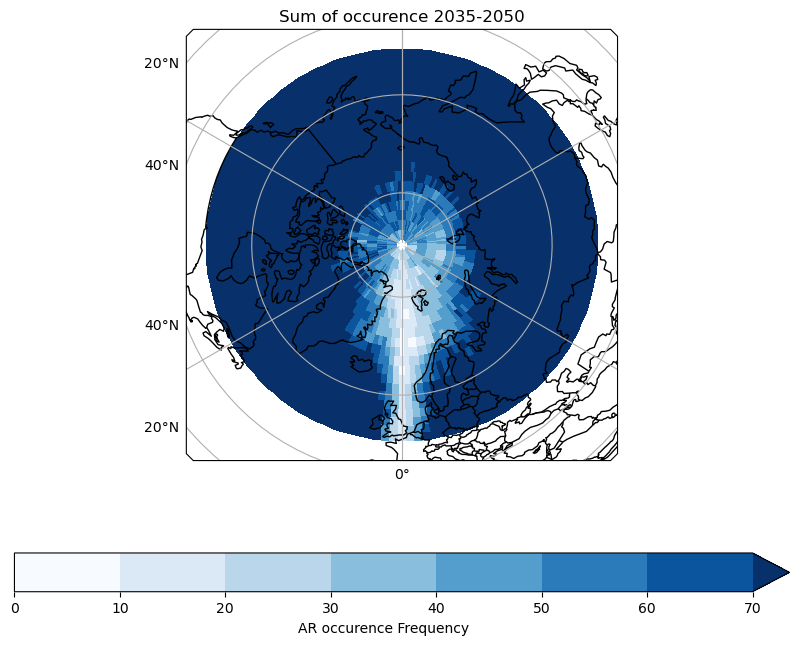

In [7]:

f,ax = plt.subplots(dpi=100, figsize =(10,8),
                    subplot_kw={'projection':ccrs.Orthographic(central_latitude=90.0)})
smarc.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    vmin=0, vmax=70,
    cbar_kwargs={
        'label':'AR occurence Frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    levels = 8
)
ax.set_title('Sum of occurence 2035-2050')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cy.feature.BORDERS);

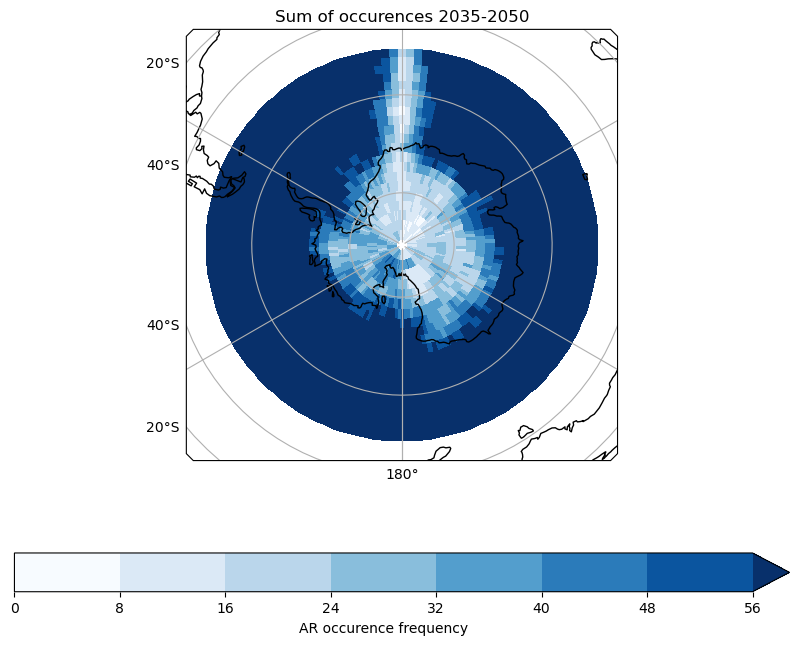

In [8]:
f,ax = plt.subplots(dpi=100, figsize =(10,8),
                    subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90.0)})

smant.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    vmin=0, vmax=56,
    cbar_kwargs={
        'label':'AR occurence frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    levels = 8
)
ax.set_title('Sum of occurences 2035-2050')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cy.feature.BORDERS);

In [ ]:
#b'/home/jovyan/Tjaernoe2022-group5/notebooks/Lea/Tjaernoe2022-group5/notebooks/Lea/20352049_AR_detection.nc'
path = '20852100_AR_detection.nc'
ar8500 = xr.open_dataset(path)

#sum of occurence of atmospheric rivers over the whole year
ar8500['ivt'].sum('time').plot()

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import cartopy as cy
import cartopy.crs as ccrs
from functions import count_ARs

In [2]:
ar245 = xr.open_dataset('ssp245_combined_q94.nc')

In [3]:
ar245

<xarray.Dataset>
Dimensions:  (lat: 96, time: 5475, lon: 144)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 2085-01-01 12:00:00 ... 2099-12-31 12:00:00
Data variables:
    ivt      (lat, time, lon) int8 ...

In [ ]:
#Wilcoxon tests

#humidity
whn245_370 = wilcoxon(sized_hum['nh245sized'],sized_hum['nh370sized'])
whn245_585 = wilcoxon(sized_hum['nh245sized'],sized_hum['nh585sized'])
whn245_nh = wilcoxon(sized_hum['nh245sized'],sized_hum['nhhsized'])
whn370_585 = wilcoxon(sized_hum['nh370sized'],sized_hum['nh585sized'])
whn370_nh = wilcoxon(sized_hum['nh370sized'],sized_hum['nhhsized'])
whn585_nh = wilcoxon(sized_hum['nh585sized'],sized_hum['nhhsized'])

w_humidity = np.array([whn245_370,whn245_585,whn245_nh,whn370_585,whn370_nh,whn585_nh])

# AOD
wan245_370 = wilcoxon(sized_aod['na245sized'],sized_aod['na370sized'])
wan245_585 = wilcoxon(sized_aod['na245sized'],sized_aod['na585sized'])
wan245_na = wilcoxon(sized_aod['na245sized'], sized_aod['nahsized'])
wan370_585 = wilcoxon(sized_aod['na370sized'],sized_aod['na585sized'])
wan370_na = wilcoxon(sized_aod['na370sized'], sized_aod['nahsized'])
wan585_na = wilcoxon(sized_aod['na585sized'], sized_aod['nahsized'])

w_aod = np.array([wan245_370,wan245_585,wan245_na,wan370_585,wan370_na,wan585_na])

# precipitation
wpn245_370 = wilcoxon(sized_precip['np245sized'],sized_precip['np370sized'])
wpn245_585 = wilcoxon(sized_precip['np245sized'],sized_precip['np585sized'])
wpn245_na = wilcoxon(sized_precip['np245sized'], sized_precip['nphsized'])
wpn370_585 = wilcoxon(sized_precip['np370sized'],sized_precip['np585sized'])
wpn370_np = wilcoxon(sized_precip['np370sized'], sized_precip['nphsized'])
wpn585_np = wilcoxon(sized_precip['np585sized'], sized_precip['nphsized'])

w_precip = np.array([wpn245_370,wpn245_585,wpn245_na,wpn370_585,wpn370_np,wpn585_np])

# temperature anomaly

sized_aod
sized_precip
sized_cloud
ssized_hum

